# Create model images for docs

This can be run as a script to populate images in `docs/`


In [1]:
from pytao import Tao
import os
import glob
from pdf2image import convert_from_path
import PIL
from PIL import Image, ImageChops

In [2]:
MODELS = [
    'cu_hxr',    
    'cu_sxr',
     #'hxr',
 'cu_spec',
# 'lcls_complex',
 #'cu_inj',
# 'cu_linac',
 'sc_hxr',          
 'sc_sxr',
 'sc_diag0',  
 'sc_inj',       
 'sc_bsyd',
 'sc_dasel',          
]

SPECIAL_CMDS = {
    'cu_linac': ['sc floor -6 12'],
    'cu_spec': ['sc floor -6 12'],
    'cu_sxr': ['sc floor -6 12'],
    'cu_hxr': ['sc floor -6 12'],
    'sc_sxr': ['sc floor -6 12'],
    'sc_hxr': ['sc floor -6 12'],    
    'sc_inj': ['sc floor -6 12'],
    'sc_diag0': ['sc floor -6 12'],
    'sc_bsyd': ['sc floor -6 12'],
    'sc_dasel': ['sc floor -20 60']
}

OUTDIR = '../docs/img/models/'
assert os.path.exists(OUTDIR)

In [3]:
# glob.glob('$LCLS_LATTICE/bmad/models/*')


===  "sc_sxr"

    ![sc_sxr](img/models/sc_sxr.png)
    


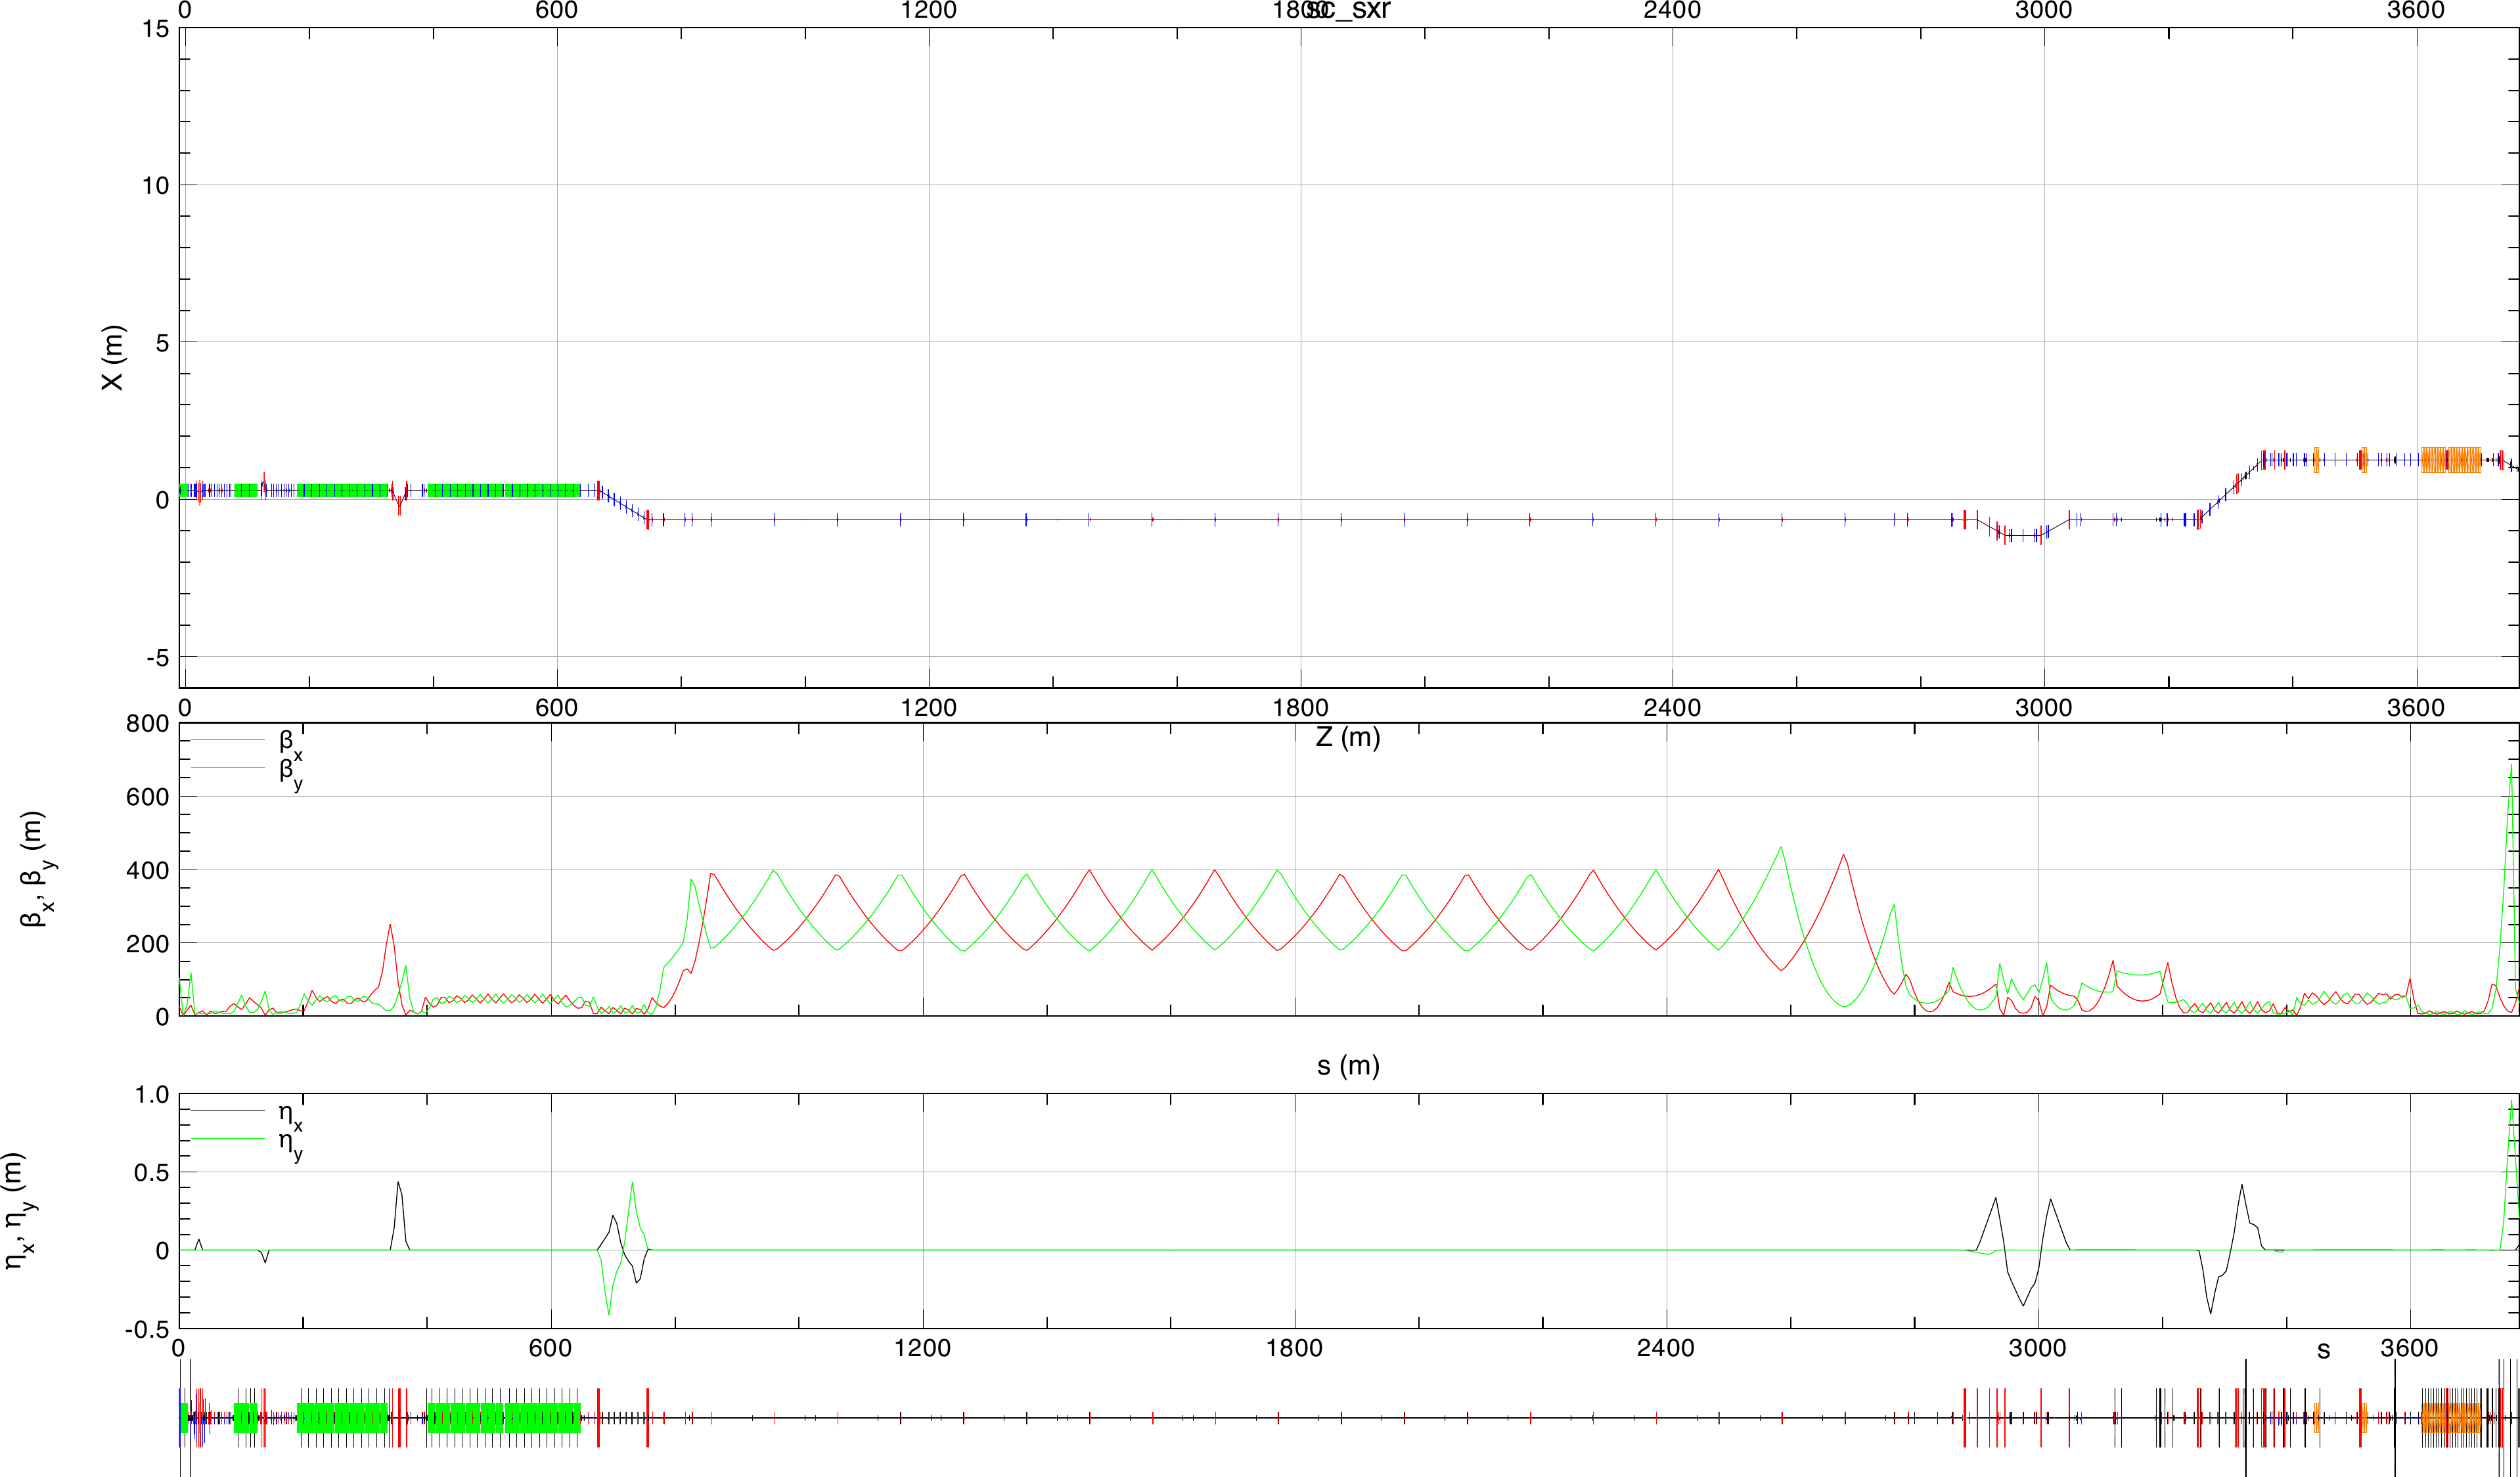

In [4]:


def scale(im, width=2048):
    w, h = im.size
    return im.resize((width, int(h * width/w)), resample=PIL.Image.Resampling.LANCZOS)

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    
def process(model, outdir=None):
    
    # Outputs
    pdf_file = f'{model}.pdf'
    png_file = f'{model}.png'
    if outdir:
        assert os.path.exists(outdir)
        pdf_file = os.path.join(outdir, pdf_file)
        png_file = os.path.join(outdir, png_file)
    
    geom = (1200, 600)
    tao = Tao(f'-init $LCLS_LATTICE/bmad/models/{model}/tao.init -geom {geom[0]}x{geom[1]}')
    tao.cmd('set global lattice_calc_on = F')
    tao.cmd(f'set graph floor.plan title = {model}')
    tao.cmd('set graph top.beta x%draw_numbers = F')
    if model in SPECIAL_CMDS:
        for cmd in SPECIAL_CMDS[model]:
            tao.cmd(cmd)
    

    
    
    tao.cmd(f'write pdf {pdf_file} -scale 1')
    files = convert_from_path(pdf_file)
    assert len(files) == 1
    im = files[0]
    im = trim(im)
    #im = scale(im)
    im.save(png_file)
    
    
    markdown=f"""
===  "{model}"

    ![{model}](img/models/{model}.png)
    """
    
    print(markdown)
    
    return im, markdown
  
    
    
im, md = process('sc_sxr', 'output')
im

In [5]:
%%time
MD = []
for model in MODELS:
    im, md = process(model, OUTDIR)
    MD.append(md)


===  "cu_hxr"

    ![cu_hxr](img/models/cu_hxr.png)
    

===  "cu_sxr"

    ![cu_sxr](img/models/cu_sxr.png)
    

===  "cu_spec"

    ![cu_spec](img/models/cu_spec.png)
    

===  "sc_hxr"

    ![sc_hxr](img/models/sc_hxr.png)
    

===  "sc_sxr"

    ![sc_sxr](img/models/sc_sxr.png)
    

===  "sc_diag0"

    ![sc_diag0](img/models/sc_diag0.png)
    

===  "sc_inj"

    ![sc_inj](img/models/sc_inj.png)
    

===  "sc_bsyd"

    ![sc_bsyd](img/models/sc_bsyd.png)
    

===  "sc_dasel"

    ![sc_dasel](img/models/sc_dasel.png)
    
CPU times: user 1min 25s, sys: 2.06 s, total: 1min 27s
Wall time: 1min 32s


In [6]:
# cut/paste into markdown
#print(''.join(MD))